### Importing libraries

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Renaming columns

In [62]:
df = pd.read_csv('caracteristics.csv', encoding='ISO-8859-1')
columns = {"Num_Acc":"accident_ID",
          "an":"year",
          "mois":"month",
          "jour":"day",
          "hrmn":"hour_min",
          "lum":"lighting ",
          "agg":"agg??",
          "int":"intersection",
          "atm":"atmosphere",
          "col":"collision",
          "com":"municipality",
          "adr":"postal_address",
          "gps":"GPS",
          "lat":"latitude",
          "long":"longitude",
          "dep":"department"}

df.rename(columns=columns, inplace=True)
df.to_csv('characteristics_1.csv')

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [63]:
df = pd.read_csv('characteristics_1.csv')
df.head()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,accident_ID,year,month,day,hour_min,lighting,agg??,intersection,atmosphere,collision,municipality,postal_address,GPS,latitude,longitude,department
0,0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      839985 non-null  int64  
 1   accident_ID     839985 non-null  int64  
 2   year            839985 non-null  int64  
 3   month           839985 non-null  int64  
 4   day             839985 non-null  int64  
 5   hour_min        839985 non-null  int64  
 6   lighting        839985 non-null  int64  
 7   agg??           839985 non-null  int64  
 8   intersection    839985 non-null  int64  
 9   atmosphere      839930 non-null  float64
 10  collision       839974 non-null  float64
 11  municipality    839983 non-null  float64
 12  postal_address  699443 non-null  object 
 13  GPS             366226 non-null  object 
 14  latitude        362471 non-null  float64
 15  longitude       362467 non-null  object 
 16  department      839985 non-null  int64  
dtypes: float64

### Mapping of feature's values

### Checking for missing values

In [65]:
def check_missing_val(df):
    for column in df.columns:
        null_count = df.isnull()[column].sum()

        # Skips over complete coloumns
        if null_count == 0:
            continue

        total_count = df[column].shape[0]
        percentage = (null_count / total_count) * 100

        print(f'Percentage of missing values in {column}: {percentage}')
    
check_missing_val(df)

Percentage of missing values in atmosphere: 0.006547735971475681
Percentage of missing values in collision: 0.0013095471942951363
Percentage of missing values in municipality: 0.00023809948987184296
Percentage of missing values in postal_address: 16.731489252784275
Percentage of missing values in GPS: 56.400888111097224
Percentage of missing values in latitude: 56.847919903331615
Percentage of missing values in longitude: 56.84839610231135


<function matplotlib.pyplot.show(close=None, block=None)>

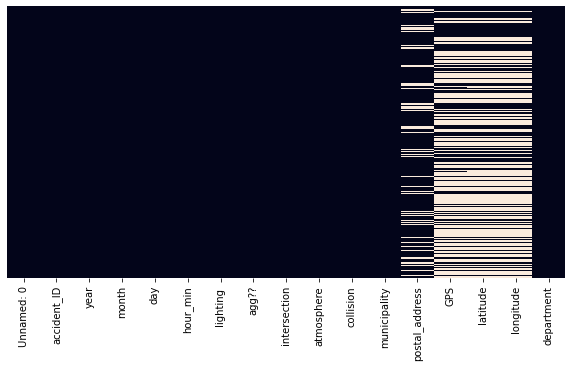

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show

### Handling missing values

In [67]:
# The Lattitude, Longitude and GPS columns can be dropped, as there have over 50% missing values
df.drop(columns=['GPS', 'latitude', 'longitude'], inplace=True)

In [68]:
# Others can be filled with the mode
df['atmosphere'].fillna(value=df['atmosphere'].mode()[0], inplace=True)
df['collision'].fillna(value=df['collision'].mode()[0], inplace=True)
df['municipality'].fillna(value=df['municipality'].mode()[0], inplace=True)
df['postal_address'].fillna(value=df['postal_address'].mode()[0], inplace=True)

check_missing_val(df)

# Visualizations